# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation
from prefixspan import PrefixSpan

# Load DataBase 

In [2]:
df= pd.read_csv('WH90_17.csv')

# Visualisation Time Series

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

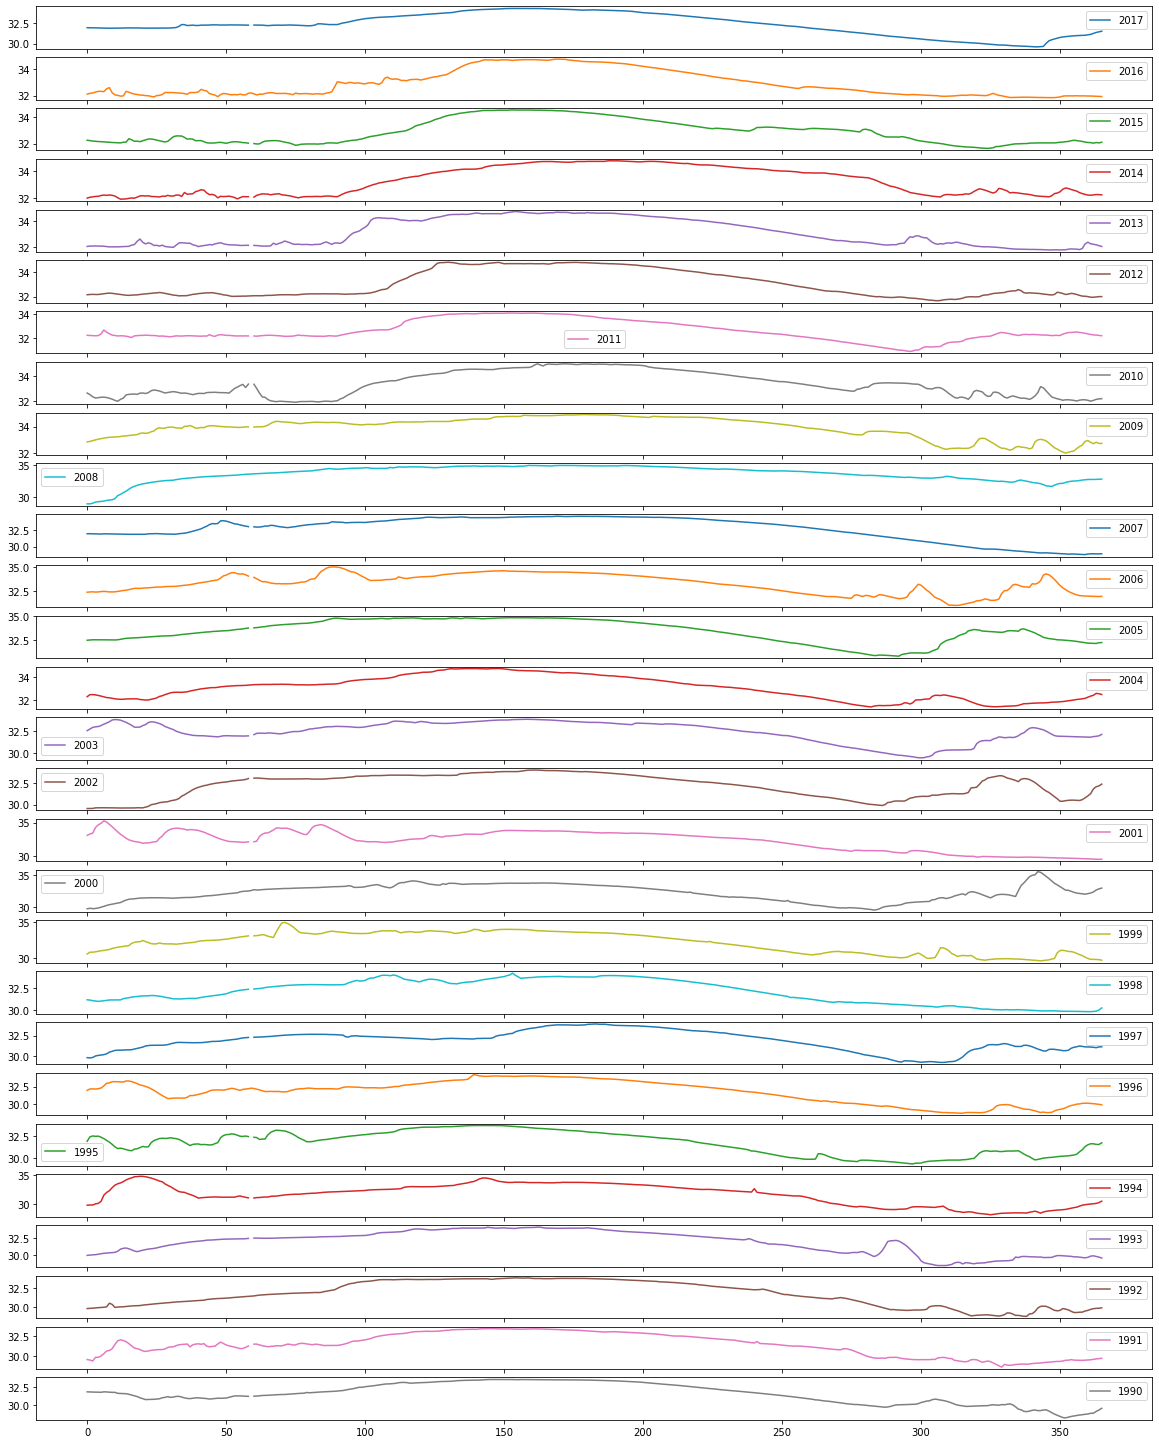

In [3]:
df.plot(subplots=True, figsize=(20, 26))

# SAX Implementation

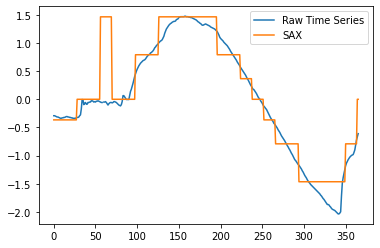

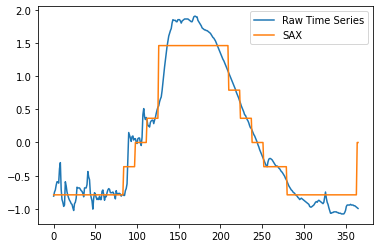

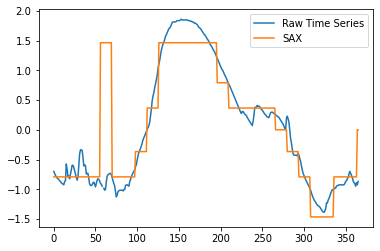

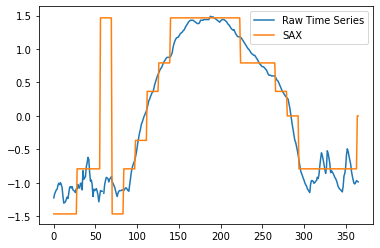

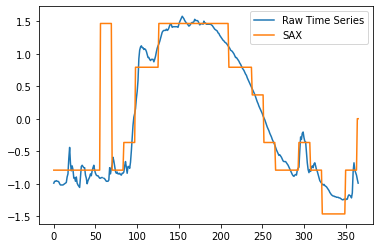

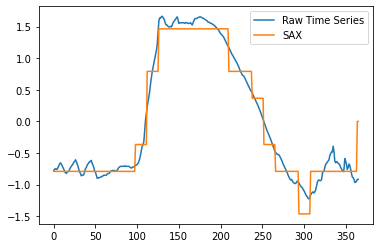

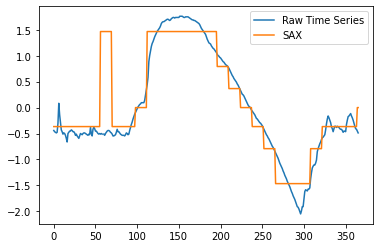

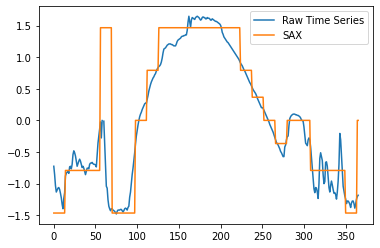

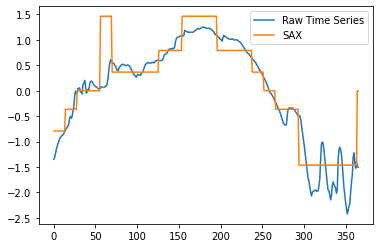

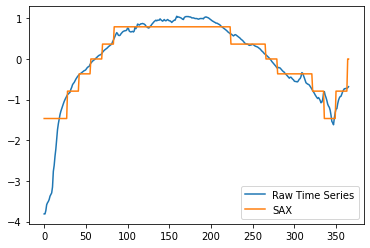

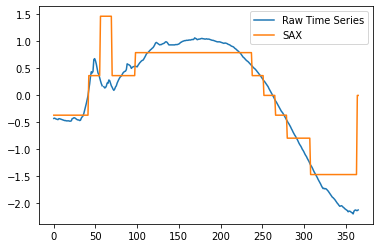

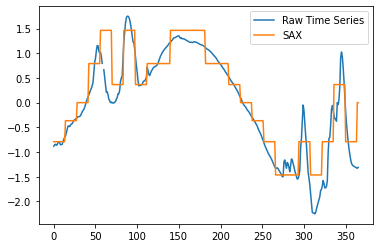

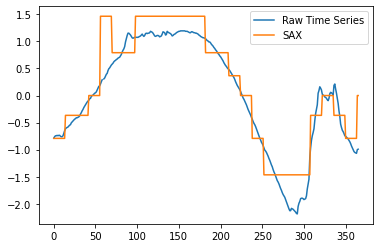

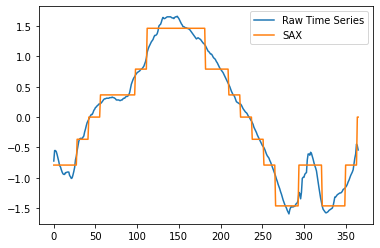

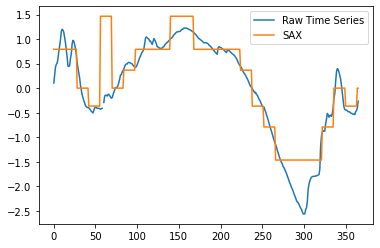

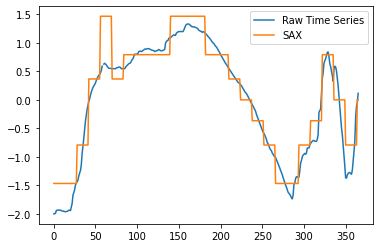

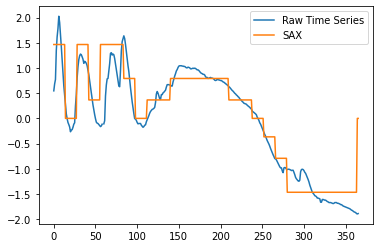

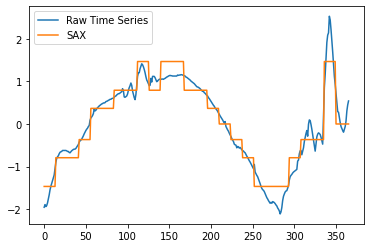

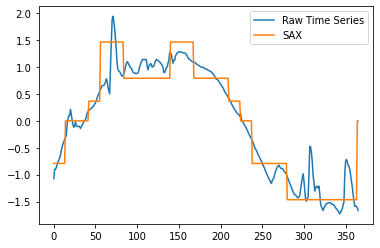

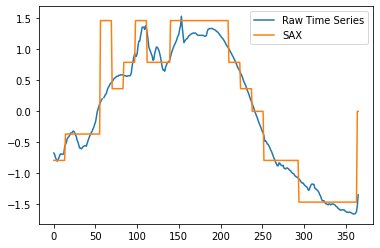

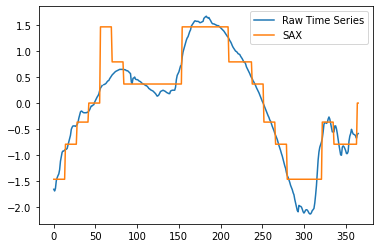

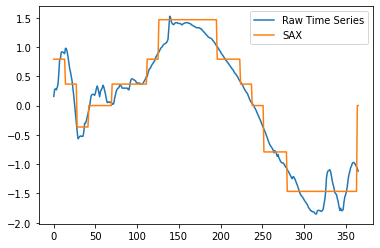

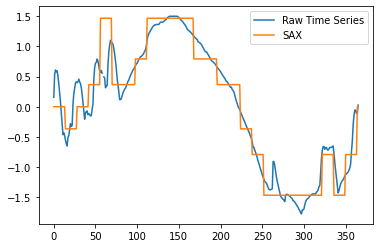

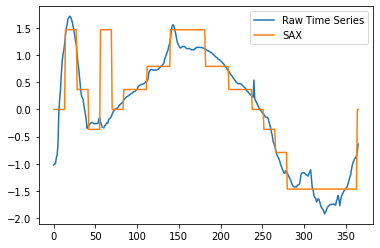

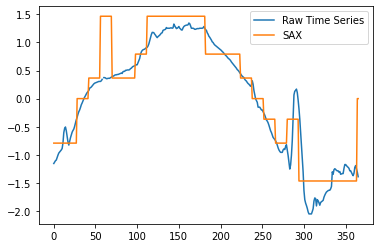

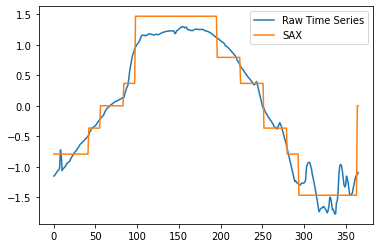

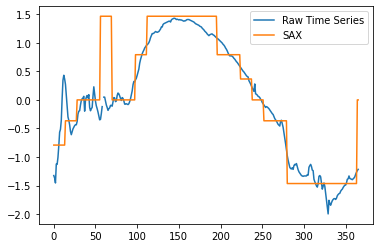

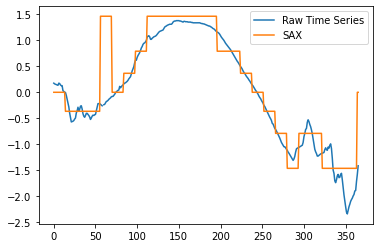

In [4]:
segment = 26
symbol = 7
anne = 2017
sax_data = {}

for i in range(df.shape[1]):
    df_Series=df.iloc[:,i]
    dataset = df_Series.values
    dataset=dataset.reshape(1, 366)
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) 
    dataset = scaler.fit_transform(dataset)

    sax = SymbolicAggregateApproximation(n_segments= segment,  alphabet_size_avg=symbol)
    sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))
    sax_data[anne] = sax.fit_transform(dataset)
    anne = anne - 1
    plt.plot(dataset[0].ravel(),label='Raw Time Series')
    plt.plot(sax_dataset_inv[0].ravel(), label='SAX')
    plt.legend(loc='best')
    plt.show()

# Time Series Mining (Motifs)

SAX Ruselt


In [5]:
def get_SAX(segment,symbol):
    wh= pd.read_csv(f'SAX{segment}_{symbol}.csv',index_col=False)
    saxlist = wh.values.tolist()
    prs = np.array(saxlist)
    return prs

In [6]:
saxRuselt = get_SAX(26,7)
saxRuselt

array([[2, 2, 3, 3, 6, 3, 3, 5, 5, 6, 6, 6, 6, 6, 5, 5, 4, 3, 2, 1, 1, 0,
        0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 2, 3, 4, 6, 6, 6, 6, 6, 6, 5, 4, 3, 2, 2, 1, 1,
        1, 1, 1, 1],
       [1, 1, 1, 1, 6, 1, 1, 2, 4, 6, 6, 6, 6, 6, 5, 4, 4, 4, 4, 3, 2, 1,
        0, 0, 1, 1],
       [0, 0, 1, 1, 6, 0, 1, 2, 4, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 4, 3, 1,
        1, 1, 1, 1],
       [1, 1, 1, 1, 6, 1, 2, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 4, 2, 1, 1, 2,
        1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 2, 5, 6, 6, 6, 6, 6, 6, 5, 5, 4, 2, 1, 1, 0,
        1, 1, 1, 1],
       [2, 2, 2, 2, 6, 2, 2, 3, 6, 6, 6, 6, 6, 6, 5, 4, 3, 2, 1, 0, 0, 0,
        1, 2, 2, 2],
       [0, 1, 1, 1, 6, 0, 0, 3, 5, 6, 6, 6, 6, 6, 6, 6, 5, 4, 3, 2, 3, 3,
        1, 1, 1, 0],
       [1, 2, 3, 3, 6, 4, 4, 4, 4, 5, 5, 6, 6, 6, 5, 5, 5, 4, 3, 2, 2, 0,
        0, 0, 0, 0],
       [0, 0, 1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 2, 2,
        2, 1, 0, 1],
       [2, 2, 2, 4, 6, 4, 4, 5, 5, 5, 5, 5, 5, 5, 

# Prefix Span

In [15]:
def get_pattern(segment,symbol,min_sup,long_pattern): 
    saxRuselt = get_SAX(segment,symbol)
    ps = PrefixSpan(saxRuselt)
    a = ps.frequent(min_sup)
    index = 0
    pattern = {}

    for i in range (len(a)):
        if (len(a[i][1]) >= long_pattern):
            print(f"{a[i][0]} : {a[i][1]}")
            pattern[index] = {'pattern': a[i][1],'segment': segment,'symbol': symbol,
                              'min_sup': a[i][0],'long_pattern': long_pattern}
            index = index + 1
    return pattern

In [21]:
pattern = get_pattern(20,7,3,16)

3 : [2, 3, 6, 6, 6, 6, 6, 5, 4, 3, 2, 1, 0, 0, 0, 0]
3 : [2, 3, 4, 6, 6, 6, 6, 5, 4, 3, 2, 1, 0, 0, 0, 0]
3 : [3, 3, 4, 5, 6, 6, 6, 6, 5, 4, 3, 1, 0, 0, 0, 0]


# prefix Span For each year

In [9]:
from prefixspan import PrefixSpan
sup = 1
anne = 2017
for idx in range (df.shape[1]) :     
    ps = PrefixSpan(sax_data[anne][0])
    print(f"{anne} : {ps.frequent(sup)}")
    anne = anne - 1

2017 : [(3, [2]), (5, [3]), (6, [6]), (4, [5]), (1, [4]), (3, [1]), (4, [0])]
2016 : [(12, [1]), (3, [2]), (2, [3]), (2, [4]), (6, [6]), (1, [5])]
2015 : [(9, [1]), (6, [6]), (2, [2]), (5, [4]), (1, [5]), (1, [3]), (2, [0])]
2014 : [(3, [0]), (8, [1]), (7, [6]), (1, [2]), (2, [4]), (4, [5]), (1, [3])]
2013 : [(9, [1]), (7, [6]), (3, [2]), (4, [5]), (1, [4]), (2, [0])]
2012 : [(13, [1]), (2, [2]), (3, [5]), (6, [6]), (1, [4]), (1, [0])]
2011 : [(10, [2]), (7, [6]), (2, [3]), (1, [5]), (1, [4]), (2, [1]), (3, [0])]
2010 : [(4, [0]), (6, [1]), (8, [6]), (4, [3]), (2, [5]), (1, [4]), (1, [2])]
2009 : [(1, [1]), (3, [2]), (3, [3]), (4, [6]), (5, [4]), (5, [5]), (5, [0])]
2008 : [(3, [0]), (3, [1]), (4, [2]), (2, [3]), (4, [4]), (10, [5])]
2007 : [(4, [2]), (4, [4]), (1, [6]), (10, [5]), (1, [3]), (2, [1]), (4, [0])]
2006 : [(5, [1]), (2, [2]), (2, [3]), (5, [5]), (5, [6]), (4, [4]), (3, [0])]
2005 : [(3, [1]), (4, [2]), (3, [3]), (7, [6]), (4, [5]), (1, [4]), (4, [0])]
2004 : [(6, [1]), (2,